# New Notebook !

In [10]:
# Scientific libraries
import numpy as np
import scipy


# Graphic libraries

import matplotlib.pyplot as plt
%matplotlib notebook


# Creating alias for magic commands

# LPPview Classes
from LPPview import *


plt.style.use("presentation")

plt.rcParams['figure.figsize'] = (4, 4)

qe = 1.6021766E-19
me =  9.109E-31 
mi = 219.6E-27
eps0 = 8.854187817e-12

savepath = "./"

sigma_0 = 0.5
sigma_max= 2.9

In [2]:
import autograd as agrd

In [88]:
def funct_scl_tosolve(dphi, Te = 20, epsi=200, gamma=1.35):
    """Here, dphi is normilized by Te0, but Te0 still needs to be given for sigma """
    a = -(gamma-1)/gamma * dphi    
    
    Te_w = Te*(1 + a)
    sigma_tmp = sigma_maxw_unsat(Te_w, epsi=epsi)
    sigma = np.where(sigma_tmp > 0.982, 0.982, sigma_tmp)
   
    
    return np.power(1 + a,1/(gamma -1)) * np.sqrt( 1 - a) - np.sqrt(4*gamma*np.pi*me/mi)/(1-sigma) 

In [89]:

def sigma_maxw_unsat(Te, epsi):
    return sigma_0 + 2.0*(Te)*(1.0 - sigma_0)/epsi

In [77]:
import autograd.numpy as numpy
import autograd.numpy as np

In [72]:
def funct_tosolve(dphi, Te = 20, epsi=200, gamma=1.35):
    """Here, dphi is normilized by Te0, but Te0 still needs to be given for sigma """
    a = -(gamma-1)/gamma * dphi
    
    Te_w = Te*(1 + a)
    sigma = sigma_maxw_unsat(Te_w, epsi=epsi)
    
    return (1-sigma)*numpy.power(1 + a,1/(gamma -1)) * numpy.sqrt( 1 - a) - numpy.sqrt(4*gamma*numpy.pi*me/mi)
           

In [90]:
grad_dphi = agrd.elementwise_grad(funct_scl_tosolve)

<IPython.core.display.Javascript object>


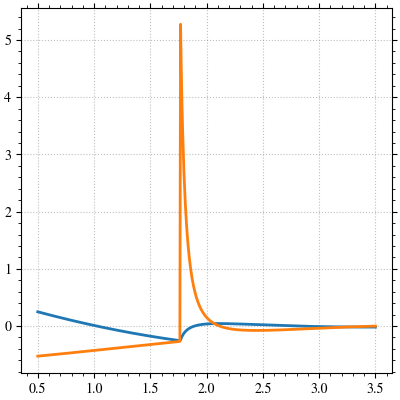

In [94]:
plt.figure()

dphi_vect = np.linspace(0.5, 3.5, 500)


plt.plot(dphi_vect, funct_scl_tosolve(dphi_vect, Te=40, epsi=45))
plt.plot(dphi_vect, [grad_dphi(d, Te=40, epsi=45) for d in dphi_vect])


In [33]:
from scipy.optimize import minimize

# Using Autograd to find the double solution

<IPython.core.display.Javascript object>


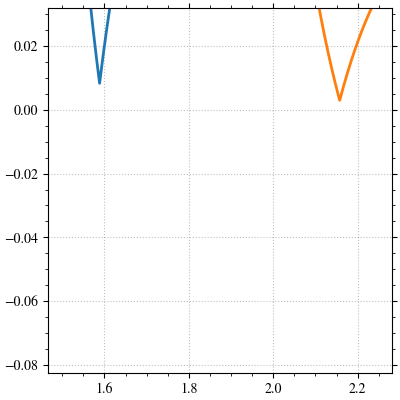

In [150]:
plt.figure()

epsi=45
gamma=1.28
cost_fun = lambda x: np.abs(funct_tosolve(x[0], x[1], epsi, gamma)) + np.abs(grad_dphi(x[0], x[1], epsi, gamma))

dphi_vect = np.linspace(1, 3, 5000)

plt.plot(dphi_vect, cost_fun([dphi_vect, 30]))
plt.plot(dphi_vect, cost_fun([dphi_vect, 35]))
plt.plot(dphi_vect, cost_fun([dphi_vect, 50]))
plt.plot(dphi_vect, cost_fun([dphi_vect, Te_cr]))

In [171]:
def messy_thresold(espi=45, gamma=1.35, Te0=30, dT0=1):
    """This method is messy, but should work:
        We itarate """
    dphi_vect = np.linspace(1, 3, 5000)

    Te = Te0
    dT = dT0
    steps = 0
    cost_fun = lambda x: np.abs(funct_tosolve(x[0], x[1], epsi, gamma)) + np.abs(grad_dphi(x[0], x[1], epsi, gamma))

    proceed = True
    old_minimum = 10
    
    def fun(Te):
        values = cost_fun([dphi_vect, Te])
        
        minimum = values.min()
        return minimum
    
    solution = minimize(fun, Te0, method="Nelder-Mead", tol=1e-12)
    
    Te_cr = solution.x[0]
    
    if not np.isclose(fun(Te_cr), 0.0, atol=1e-4):
        print(fun(Te_cr))
        Te_cr = np.NAN
    
    return Te_cr
                          

In [161]:
Te_cr = messy_thresold(45, 1.35, 30, 5)
Te_cr

47.39045534469187

In [147]:
Te_cr = messy_thresold(45, 1.35, 30, 5)
Te_cr

47.448349999999984

Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib64/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.7/multipr

In [176]:
epsi = 45
gamma_vect = np.linspace(1.05, 1.8, 50)

def f(g):
    return messy_thresold(epsi, g, 35, -1)

Te_cr_vect_45 = p.map( f  ,gamma_vect )

0.008700897542146428


/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in power
  return f_raw(*args, **kwargs)
/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/autograd/numpy/numpy_vjps.py:59: RuntimeWarning: invalid value encountered in power
  lambda ans, x, y : unbroadcast_f(x, lambda g: g * y * x ** anp.where(y, y - 1, 1.)),
/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in power
  return f_raw(*args, **kwargs)
/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in power
  return f_raw(*args, **kwargs)
/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/autograd/numpy/numpy_vjps.py:59: RuntimeWarning: invalid value encountered in power
  lambda ans, x, y : unbroadcast_f(x, lambda g: g * y * x ** anp.where(y, y - 1, 1.)),
/home/tavant/th

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "

KeyboardInterrupt: 

KeyboardInterrupt
  File "/usr/lib64/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
KeyboardInterrupt


In [172]:


epsi = 35

Te_cr_vect_35 = [messy_thresold(epsi, g, 35, -1) for g in gamma_vect]

0.059923247990599934
0.06316913145860606
0.06513607686232249
0.06604395712923242
0.06689252873908888
0.06767400192905708
0.008700897542146428
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0651360768623237
0.06604395712923257
0.06689252873908925
0.06767400192905662
0.06837951063809478
0.06899891643851583
0.06952057216783947
0.06993103380779093
0.07021470554469193
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


<IPython.core.display.Javascript object>


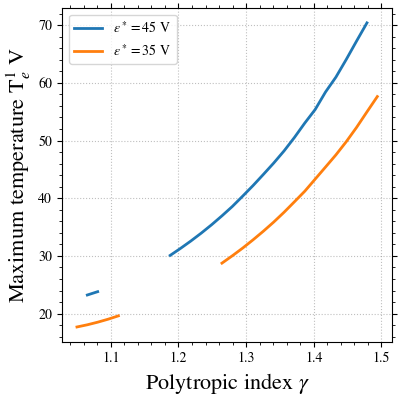

In [170]:
plt.figure()
plt.plot(gamma_vect, Te_cr_vect_45, label="$\\epsilon^*=45$ V")
plt.plot(gamma_vect, Te_cr_vect_35, label="$\\epsilon^*=35$ V")

plt.xlabel("Polytropic index $\\gamma$")
plt.ylabel("Maximum temperature T$_{e}^1$ V")

plt.legend()

In [54]:

def tresold(x0, epsi=45, bounds=[0.5, 3.856], xtol=1e-26):
    """Overide fsove to add bounds"""
    
    r = minimize(fun=lambda x: np.abs(funct_tosolve(x, epsi)) + np.abs(grad_dphi(x[0], x[1], epsi)), x0=x0, bounds=[bounds, [0, 200]], tol=xtol)
        
    r²
    return  r


In [55]:
tresold([2, 38])

      fun: 0.008388775829771784
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00023807,  0.        ])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 15
      nit: 4
   status: 0
  success: True
        x: array([ 3.856     , 37.98098202])